# Dealing With Class Imbalanced Datasets For Classification

In [58]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTENC


data=pd.read_csv("training data.csv",sep=";")
test=pd.read_csv("test data.csv",sep=";")

data = data.drop([data.columns[-1]],axis = 1)
test = test.drop([test.columns[-1]],axis = 1)

In [126]:
print(data['adopter'].value_counts())
x_cols=data.columns[:-1]

0    85142
1     1540
Name: adopter, dtype: int64


In [142]:
from sklearn.model_selection import train_test_split
X = data[x_cols]
y = data['adopter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [143]:
smt = SMOTE(ratio=0.03)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [ ]:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

In [ ]:
#class_weight
#cross_validation
#over-predict label
#threshold

In [144]:
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:0.05, 1:0.95})

rdf = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False,
            verbose=0, warm_start=False)

In [145]:
rdf.fit(X_train, y_train)

# Predict..
pred_RF = rdf.predict(X_test)

In [146]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

[[32933  1125]
 [  504   111]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     34058
           1       0.09      0.18      0.12       615

    accuracy                           0.95     34673
   macro avg       0.54      0.57      0.55     34673
weighted avg       0.97      0.95      0.96     34673

0.953018198598333


In [113]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

[[33051  1006]
 [  497   119]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     34057
           1       0.11      0.19      0.14       616

    accuracy                           0.96     34673
   macro avg       0.55      0.58      0.56     34673
weighted avg       0.97      0.96      0.96     34673

0.9566521500879647


In [124]:
# Cross-Validation
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

cv = KFold(n_splits=5)
#cv = StratifiedKFold(5)
result = cross_val_score(rdf, X_train, y_train, cv=cv, scoring = 'f1')
print(result)
result.mean()

[0.11934901 0.12392427 0.15770609 0.15642458 0.21997755]


0.1554763002867948

In [78]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100,1000]

gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': n_estimators,
        
        max_depth
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)


Best parameters : {'n_estimators': 1000}


In [98]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
    estimator=rdf,
    param_grid={
        'n_estimators': [300, 700, 1000],
        'max_depth': [6, 8, 10, 20], 
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf' : [4, 8, 12],
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


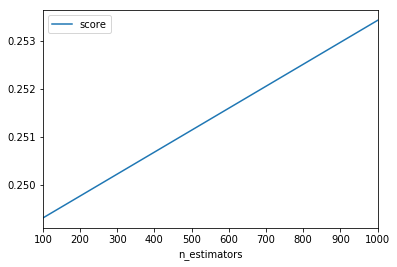

In [95]:
# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'n_estimators': n_estimators })
dataz.plot(x='n_estimators')

In [94]:
threshold = 0.5
pred_RF = rdf.predict(X_test)
prob_RF = rdf.predict_proba(X_test)[:, 1]

 
predicted = (prob_RF >= threshold).astype('int')
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     32546
           1       0.28      0.08      0.13      2127

    accuracy                           0.93     34673
   macro avg       0.61      0.53      0.55     34673
weighted avg       0.90      0.93      0.91     34673



In [106]:
predictions = rdf.predict(test)

In [107]:
import pandas as pd
pd.DataFrame(predictions).to_csv("submit4.csv")